In [1530]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import re


In [1531]:
df = pd.read_csv('wildfires.csv')
df = df.dropna()
df

,area,class,evi,lat,lon,lst_day,lst_night,time,day
0,1.373816e+07,no_fire,0.216975,33.408854,-117.076050,307.487500,289.228750,2018-06-26,0
1,1.202089e+07,no_fire,0.242957,36.141667,-118.236654,305.820000,283.662857,2018-06-26,0
2,5.452330e+08,no_fire,0.398504,41.055741,-121.923551,300.717102,291.531937,2018-06-26,0
3,4.121447e+07,no_fire,0.265087,35.721354,-118.660329,310.887083,290.742083,2018-06-26,0
4,8.586347e+07,no_fire,0.202601,37.484083,-120.411426,317.291400,294.068200,2018-06-26,0
...,...,...,...,...,...,...,...,...,...
579,6.010443e+06,fire,0.354783,39.276786,-121.670988,309.122857,292.431429,2019-06-26,365
580,6.010443e+06,fire,0.313343,37.986310,-121.193545,310.996667,288.516000,2019-06-26,365
581,1.545542e+07,fire,0.163647,37.479630,-121.172461,315.414444,289.468889,2019-06-26,365
582,9.444982e+06,fire,0.325075,36.456439,-119.159807,313.969091,293.300000,2019-06-26,365


In [1532]:
df['class'].value_counts()

fire       249
no_fire    235
Name: class, dtype: int64

In [1251]:
df.time

0      2018-06-26
1      2018-06-26
2      2018-06-26
3      2018-06-26
4      2018-06-26
          ...    
579    2019-06-26
580    2019-06-26
581    2019-06-26
582    2019-06-26
583    2019-06-26
Name: time, Length: 484, dtype: object

In [1252]:
def date_to_month(datetime):
    datetime = int(re.search("-\d\d",datetime).group(0))
    return datetime

In [1253]:
df['month'] = abs(df.time.apply(date_to_month))

In [1254]:
df.month.value_counts()

6     67
8     50
9     46
7     44
3     44
4     38
10    37
5     36
11    33
12    32
1     30
2     27
Name: month, dtype: int64

In [1533]:
one_hot = pd.get_dummies(df['class']).fire
df['class'] = one_hot
df

,area,class,evi,lat,lon,lst_day,lst_night,time,day
0,1.373816e+07,0,0.216975,33.408854,-117.076050,307.487500,289.228750,2018-06-26,0
1,1.202089e+07,0,0.242957,36.141667,-118.236654,305.820000,283.662857,2018-06-26,0
2,5.452330e+08,0,0.398504,41.055741,-121.923551,300.717102,291.531937,2018-06-26,0
3,4.121447e+07,0,0.265087,35.721354,-118.660329,310.887083,290.742083,2018-06-26,0
4,8.586347e+07,0,0.202601,37.484083,-120.411426,317.291400,294.068200,2018-06-26,0
...,...,...,...,...,...,...,...,...,...
579,6.010443e+06,1,0.354783,39.276786,-121.670988,309.122857,292.431429,2019-06-26,365
580,6.010443e+06,1,0.313343,37.986310,-121.193545,310.996667,288.516000,2019-06-26,365
581,1.545542e+07,1,0.163647,37.479630,-121.172461,315.414444,289.468889,2019-06-26,365
582,9.444982e+06,1,0.325075,36.456439,-119.159807,313.969091,293.300000,2019-06-26,365


In [1233]:
#Undersampling majority class
count_class_0, count_class_1 = df['class'].value_counts()

# Divide by class
df_class_0 = df[df['class'] == 0]
df_class_1 = df[df['class'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

In [1090]:
#Oversampling minority class
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

In [ ]:
#df = df_test_under.copy()
#df = df_test_over.copy()
#df

In [1534]:
y = df['class']
x = df.drop(['class','time','lst_night','day'], axis=1)
x['area'] = x['area'].apply(lambda x: x/1000000)

In [1535]:
x

,area,evi,lat,lon,lst_day
0,13.738155,0.216975,33.408854,-117.076050,307.487500
1,12.020886,0.242957,36.141667,-118.236654,305.820000
2,545.233030,0.398504,41.055741,-121.923551,300.717102
3,41.214465,0.265087,35.721354,-118.660329,310.887083
4,85.863469,0.202601,37.484083,-120.411426,317.291400
...,...,...,...,...,...
579,6.010443,0.354783,39.276786,-121.670988,309.122857
580,6.010443,0.313343,37.986310,-121.193545,310.996667
581,15.455424,0.163647,37.479630,-121.172461,315.414444
582,9.444982,0.325075,36.456439,-119.159807,313.969091


In [1536]:
#splitting
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2)
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [22]:
test_x.shape

(97, 3)

In [1543]:
def check_params(parameters):

    mlp = MLPClassifier(solver='lbfgs', max_iter = 10000)
    clf = GridSearchCV(mlp, parameters, cv = 3)
    clf.fit(train_x, train_y)
    grid_results = pd.DataFrame(clf.cv_results_)
    return grid_results[grid_results.rank_test_score.isin([1,2,3,4,5])]

In [1544]:
params = {
    'alpha':[0.01,0.1,0.8,1,2,3,4], 
    'hidden_layer_sizes':[(8,8),(14,14),(28,14),(28,28),(64,28),(64,64)]
}
results = check_params(params).sort_values('rank_test_score')
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
29,5.277615,1.239676,0.000665,4.700227e-04,2,"(64, 64)","{'alpha': 2, 'hidden_layer_sizes': (64, 64)}",0.666667,0.697674,0.744186,0.702842,0.031857,1
13,1.548026,0.174771,0.000997,7.018853e-07,0.8,"(14, 14)","{'alpha': 0.8, 'hidden_layer_sizes': (14, 14)}",0.643411,0.697674,0.713178,0.684755,0.029912,2
28,6.118899,3.260646,0.000998,9.989584e-07,2,"(64, 28)","{'alpha': 2, 'hidden_layer_sizes': (64, 28)}",0.643411,0.666667,0.736434,0.682171,0.039527,3
26,1.368363,0.754302,0.000988,1.574646e-05,2,"(28, 14)","{'alpha': 2, 'hidden_layer_sizes': (28, 14)}",0.627907,0.682171,0.728682,0.679587,0.041182,4
27,1.766592,0.731384,0.000664,4.694601e-04,2,"(28, 28)","{'alpha': 2, 'hidden_layer_sizes': (28, 28)}",0.651163,0.682171,0.705426,0.679587,0.022228,4


In [1520]:
COLOR_MAP = {0 : 'Orange',
            1 : 'Red',
            2 : 'Blue',
            3 : '#35b479ff',
            4 : '#c3df2eff',
            5 : '#fde725ff'
           }

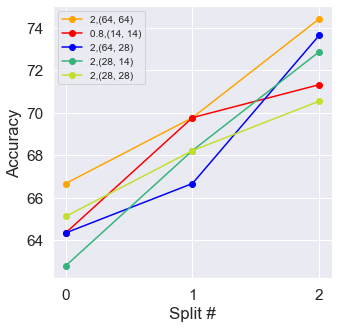

In [1553]:
fig, ax= plt.subplots(figsize = (5,5))
for i in np.arange(0,5):
    grid_df = results.sort_values('rank_test_score').iloc[i]
    y = grid_df[['split0_test_score','split1_test_score','split2_test_score']]
    x = ['0','1','2']
    plt.plot(x,y*100, '-bo',color = COLOR_MAP[i],label =  str(grid_df.param_alpha) + ',' + str(grid_df.param_hidden_layer_sizes))
    plt.xlabel("Split #")
    plt.ylabel("Accuracy")
    plt.legend(loc=0, prop={'size': 10})
plt.savefig("Param_accs")
plt.show()

In [ ]:
params = {
    'alpha':[0.01,0.1,0.8,1,2,3,4], 
    'hidden_layer_sizes':[(64,64)]
}
results = check_params(params)
results

In [1308]:
accuracies = results[['param_alpha','mean_test_score']]
accuracies

,param_alpha,mean_test_score
0,0.01,0.653747
1,0.1,0.653747
2,0.8,0.640827
3,1,0.656331
4,2,0.684755
5,3,0.661499
6,4,0.648579


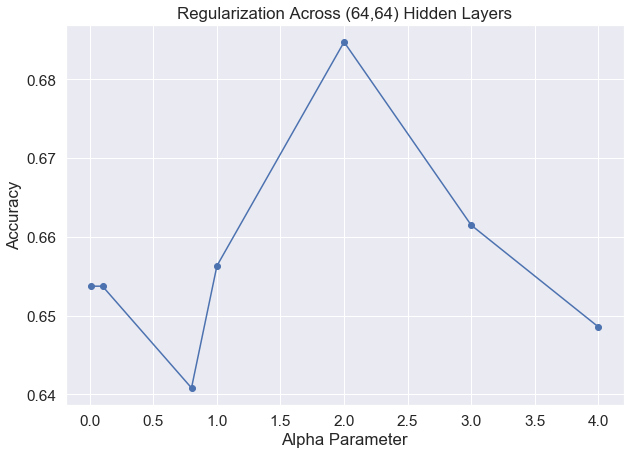

In [1454]:
y = accuracies.mean_test_score
x = accuracies.param_alpha
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(x,y, '-bo')
plt.xlabel("Alpha Parameter")
plt.ylabel("Accuracy")
plt.title("Regularization Across (64,64) Hidden Layers")
plt.savefig("alpha_params")
plt.show()

In [1443]:
#MLP Classifier Function
#solver: 'Adam' works better for bigger datasets, 'lbfgs' faster and better for smaller
#regularization parameter: paper did between 0.8 - 4, and compared results
#hiddenlayers: 2 layers with 64 units each
#Best inputs rn: {'alpha': 2 'hidden_layer_sizes': (64, 64)}

mlp = MLPClassifier(solver='lbfgs', max_iter = 10000, alpha=2, hidden_layer_sizes = (64,64))
mlp.fit(train_x, train_y)

test_preds = mlp.predict(test_x)
conf_mat = metrics.confusion_matrix(test_y, test_preds)
print('Accuracy:')
print(accuracy_score(test_y, test_preds))
print('Confusion Matrix:')
print(conf_mat)
print(classification_report(test_y,test_preds))

Accuracy:
0.6804123711340206
Confusion Matrix:
[[26 18]
 [13 40]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.63        44
           1       0.69      0.75      0.72        53

    accuracy                           0.68        97
   macro avg       0.68      0.67      0.67        97
weighted avg       0.68      0.68      0.68        97



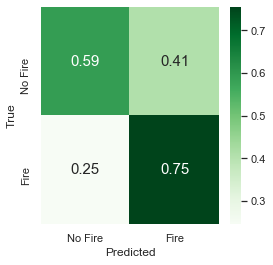

In [1568]:
cm_cols = ['No Fire', 'Fire']
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(conf_mat_normalized, index= cm_cols, columns=cm_cols)

fig, ax = plt.subplots(figsize=(4,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm,cmap='Greens',annot=True,annot_kws={"size": 15})# font size
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
plt.savefig('nn_cm.png')
plt.show()

In [1332]:
pd.DataFrame(test_preds)[0].value_counts()

1    55
0    42
Name: 0, dtype: int64

In [1570]:
accuracy = accuracy_score(test_y, test_preds)
precision = metrics.precision_score(test_y, test_preds)
recall = metrics.recall_score(test_y, test_preds)

In [1441]:
fpr, tpr, thresholds = roc_curve(test_y, test_preds)
fpr,tpr

(array([0.        , 0.34090909, 1.        ]),
 array([0.        , 0.75471698, 1.        ]))

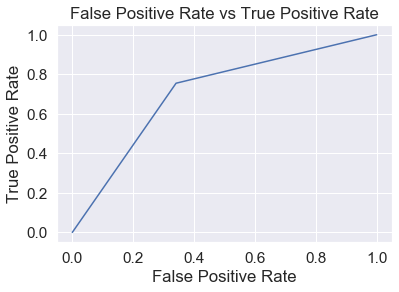

In [1446]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('False Positive Rate vs True Positive Rate')
plt.savefig("fpr vs tpr")
plt.show()

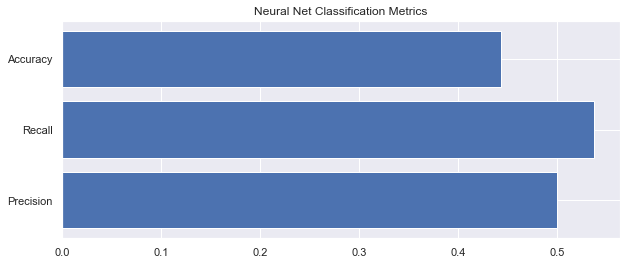

In [1571]:
y = ['Precision', 'Recall', 'Accuracy']
x = [precision, recall, accuracy]

fig, ax = plt.subplots(figsize=(10,4))
ax.barh(y,x)
#ticks = np.arange(0,1.1,0.1)
#ax.set_xticks(ticks)
ax.set_title("Neural Net Classification Metrics")
plt.savefig("metrics")
plt.show()

In [1267]:
preds = pd.DataFrame()
preds['True'] = test_y.reset_index()['class']
preds['Predictions'] = test_preds
preds.head()

,True,Predictions
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [1268]:
#Predictions
preds[preds['True'] == 1]

,True,Predictions
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
7,1,1
10,1,1
11,1,1
12,1,0
14,1,1


### Training with first 305 days, to predict last 60

In [81]:
train_x = df[df.day<=305].drop(['class','time','day','lst_night'], axis=1)
train_y = df[df.day<=305]['class']

test_x = df[df.day>305].drop(['class','time','day','lst_night'], axis=1)
test_y = df[df.day>305]['class']

In [84]:
train_x['area'] = train_x['area'].apply(lambda x: x/1000000)
test_x['area'] = test_x['area'].apply(lambda x: x/1000000)
test_x.shape

(82, 5)

In [85]:
test_x

,area,evi,lat,lon,lst_day
195,6.869078,0.382356,39.880208,-121.599115,293.767500
196,11.162251,0.350431,39.333654,-120.872097,292.860000
197,28.334945,0.331824,40.458712,-121.986116,303.275758
198,7.727712,0.361333,34.179167,-117.873876,295.137778
199,6.010443,0.302064,39.669643,-120.926291,290.148571
...,...,...,...,...,...
579,6.010443,0.354783,39.276786,-121.670988,309.122857
580,6.010443,0.313343,37.986310,-121.193545,310.996667
581,15.455424,0.163647,37.479630,-121.172461,315.414444
582,9.444982,0.325075,36.456439,-119.159807,313.969091


In [86]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [88]:
parameters = {
    'alpha':[0.01,0.1,0.8,1,2], 
    'hidden_layer_sizes':[(8,8),(14,14),(28,14),(28,28),(64,28),(64,64)]
}
results = check_params(parameters)
results

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
14,1.426999,0.371755,0.00050,5.002618e-04,0.8,"(28, 14)","{'alpha': 0.8, 'hidden_layer_sizes': (28, 14)}",0.574257,0.693069,0.663366,0.666667,0.649254,0.044946,1
16,4.782750,1.654211,0.00050,4.997855e-04,0.8,"(64, 28)","{'alpha': 0.8, 'hidden_layer_sizes': (64, 28)}",0.643564,0.623762,0.643564,0.666667,0.644279,0.015147,2
17,5.653499,2.278253,0.00075,4.329816e-04,0.8,"(64, 64)","{'alpha': 0.8, 'hidden_layer_sizes': (64, 64)}",0.633663,0.613861,0.613861,0.656566,0.629353,0.017539,4
20,1.823500,0.486115,0.00050,4.999043e-04,1,"(28, 14)","{'alpha': 1, 'hidden_layer_sizes': (28, 14)}",0.613861,0.673267,0.564356,0.666667,0.629353,0.044148,4
23,6.714257,1.806432,0.00100,7.420718e-07,1,"(64, 64)","{'alpha': 1, 'hidden_layer_sizes': (64, 64)}",0.643564,0.613861,0.554455,0.696970,0.626866,0.051383,6
24,0.352500,0.238326,0.00050,5.000234e-04,2,"(8, 8)","{'alpha': 2, 'hidden_layer_sizes': (8, 8)}",0.633663,0.613861,0.603960,0.656566,0.626866,0.020078,6
27,2.484000,0.684024,0.00050,5.001426e-04,2,"(28, 28)","{'alpha': 2, 'hidden_layer_sizes': (28, 28)}",0.603960,0.613861,0.564356,0.727273,0.626866,0.060322,6
28,3.867000,2.320343,0.00050,5.003812e-04,2,"(64, 28)","{'alpha': 2, 'hidden_layer_sizes': (64, 28)}",0.594059,0.613861,0.613861,0.686869,0.626866,0.035243,6
29,5.339500,1.828693,0.00075,4.329471e-04,2,"(64, 64)","{'alpha': 2, 'hidden_layer_sizes': (64, 64)}",0.584158,0.643564,0.594059,0.737374,0.639303,0.060427,3


In [89]:
mlp = MLPClassifier(solver='lbfgs', max_iter = 10000, alpha=0.8, hidden_layer_sizes = (28, 14))
#clf = GridSearchCV(mlp, parameters, cv = 2)
mlp.fit(train_x, train_y)

test_preds = mlp.predict(test_x)
conf_mat = metrics.confusion_matrix(test_y, test_preds)
print('Accuracy:')
print(accuracy_score(test_y, test_preds))
print('Confusion Matrix:')
print(conf_mat)
print(classification_report(test_y,test_preds))

Accuracy:
0.6097560975609756
Confusion Matrix:
[[25 15]
 [17 25]]
              precision    recall  f1-score   support

           0       0.60      0.62      0.61        40
           1       0.62      0.60      0.61        42

    accuracy                           0.61        82
   macro avg       0.61      0.61      0.61        82
weighted avg       0.61      0.61      0.61        82

